In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimise

In [16]:
def lorentz(x, A, M, G):
    return A/(1 + (2*(x - M)/G)**2 );

def spectrum_steel(x, B, A, x0, G):
    return B - lorentz(x, A, x0, G);

def spectrum_np(x, B, A, x0, G, S):
    return B - lorentz(x, A, (x0-S/2), G) - lorentz(x, A, (x0+S/2), G);

def spectrum_iron(x, B, A1, A2, A3, x01, x02, x03, G1, G2, G3, S1, S2, S3):
    return B - lorentz(x, A1, (x01-S1/2), G1) - lorentz(x, A1, (x01+S1/2), G1) - lorentz(x, A2, (x02-S2/2), G2) - lorentz(x, A2, (x02+S2/2), G2) - lorentz(x, A3, (x03-S3/2), G3) - lorentz(x, A3, (x03+S3/2), G3)

In [17]:
param0_steel = np.array([1170., 350., 249., 23.27]);
param0_np = np.array([2620., 385., 243.5, 15., 60.]);
param0_iron = np.array([62000., 8400., 7800., 4600., 253., 253., 253., 20., 20., 20., 366., 212., 60.])

In [18]:
steel_data = np.loadtxt('ss.dat')
iron_data = np.loadtxt('ci.dat')
np_data = np.loadtxt('np.dat')

steel_folded = steel_data[1:511, 1] + steel_data[1022:512:-1, 1];
iron_folded = iron_data[1:511, 1] + iron_data[1022:512:-1, 1];
np_folded = np_data[1:511, 1] + np_data[1022:512:-1, 1];
channel = np.array(np.linspace(1, 510, 510))

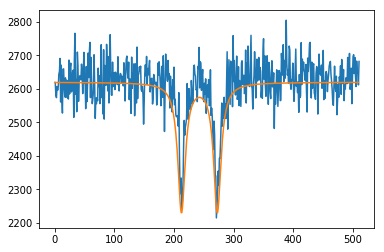

In [19]:
plt.plot(channel, np_folded[:])
plt.plot(spectrum_np(channel, *param0_np))

In [20]:
param_steel, cov_steel = optimise.curve_fit(spectrum_steel, channel, steel_folded, p0=param0_steel)
param_iron, cov_iron = optimise.curve_fit(spectrum_iron, channel, iron_folded, p0=param0_iron)
param_np, cov_np = optimise.curve_fit(spectrum_np, channel, np_folded, p0=param0_np)

steel_err = np.sqrt(np.diag(cov_steel))
iron_err = np.sqrt(np.diag(cov_iron))
np_err = np.sqrt(np.diag(cov_np))

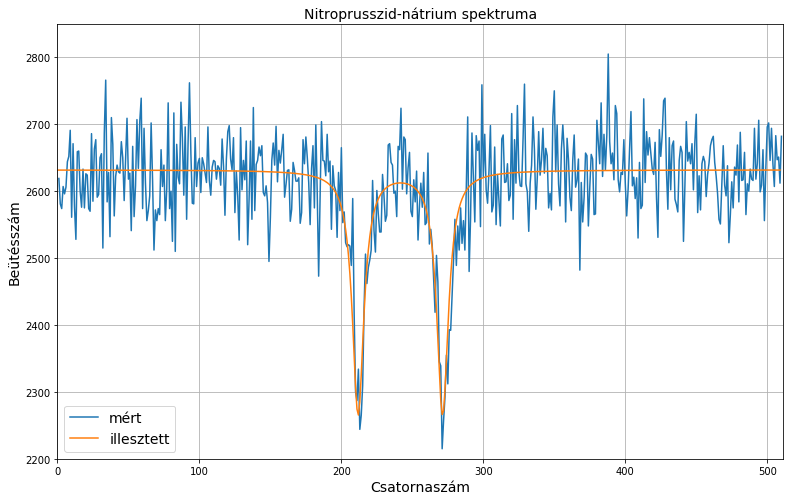

In [21]:
plt.figure(figsize=(13,8))
plt.xlim(0,511)
plt.ylim(2200,2850)
plt.title('Nitroprusszid-nátrium spektruma', fontsize = 14)
plt.xlabel('Csatornaszám', fontsize = 14)
plt.ylabel('Beütésszám', fontsize = 14)
plt.grid(True)


plt.plot(channel, np_folded[:], label= 'mért')
plt.plot(spectrum_np(channel, *param_np),  label= 'illesztett')

plt.legend(fontsize = 14, loc='lower left')
plt.savefig('np.png')


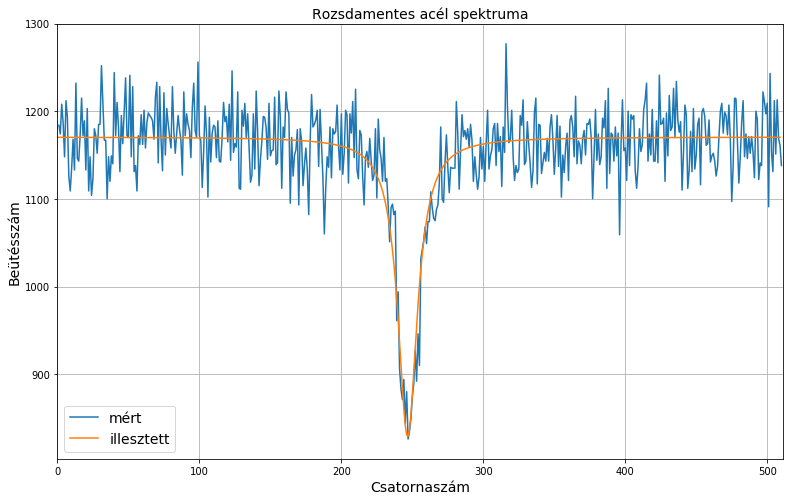

In [22]:
plt.figure(figsize=(13,8))
plt.xlim(0,511)
#plt.ylim(2200,2850)
plt.title('Rozsdamentes acél spektruma', fontsize = 14)
plt.xlabel('Csatornaszám', fontsize = 14)
plt.ylabel('Beütésszám', fontsize = 14)
plt.grid(True)

plt.plot(channel, steel_folded[:], label = 'mért')
plt.plot(spectrum_steel(channel, *param_steel), label = 'illesztett')

plt.legend(fontsize = 14, loc='lower left')
plt.savefig('acel.png')

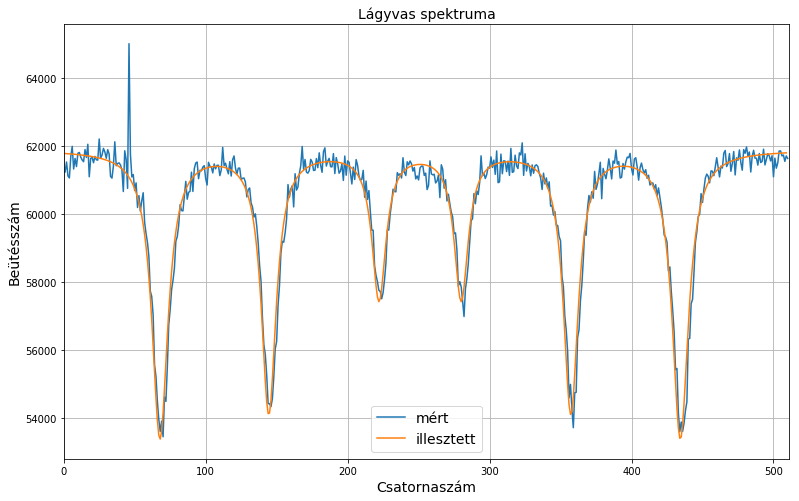

In [23]:
plt.figure(figsize=(13,8))
plt.xlim(0,511)
#plt.ylim(2200,2850)
plt.title('Lágyvas spektruma', fontsize = 14)
plt.xlabel('Csatornaszám', fontsize = 14)
plt.ylabel('Beütésszám', fontsize = 14)
plt.grid(True)

plt.plot(channel, iron_folded[:], label='mért')
plt.plot(spectrum_iron(channel, *param_iron), label='illesztett')


plt.legend(fontsize = 14, loc='lower center')
plt.savefig('vas.png')

In [24]:
print(param_steel)
print(steel_err)

[1170.58065589  342.02897203  247.64755396   16.57003278]
[ 1.66428926 13.2806942   0.32165614  0.95882028]


In [25]:
print(param_iron)
print(iron_err)

[6.18951914e+04 8.44588508e+03 7.68634624e+03 4.33097430e+03
 2.52102290e+02 2.51860097e+02 2.52058808e+02 1.37874735e+01
 1.26773624e+01 1.19827252e+01 3.66582128e+02 2.12801061e+02
 5.79143916e+01]
[2.59235023e+01 9.82439173e+01 1.02458424e+02 1.05670216e+02
 7.99567407e-02 8.42481440e-02 1.45709694e-01 2.60246897e-01
 2.67889186e-01 4.36892227e-01 1.59938952e-01 1.68522200e-01
 2.90133514e-01]


In [26]:
print(param_np)
print(np_err)

[2631.85102623  364.53528678  242.55469426    9.86394921   59.50942164]
[ 2.58445566 18.66545797  0.25243739  0.72948534  0.50387927]


In [38]:
print('First iron peak w err: ', param_iron[4] - param_iron[10]/2., 'pm', np.sqrt(iron_err[4]**2 + (iron_err[10]/2.)**2))
print('Last iron peak w err: ', param_iron[4] + param_iron[10]/2., 'pm', np.sqrt(iron_err[4]**2 + (iron_err[10]/2.)**2))

First iron peak w err:  68.81122643062315 pm 0.11308491269354481
Last iron peak w err:  435.3933542998952 pm 0.11308491269354481


In [43]:
c = 299792458
deltaV = 0.0106162
deltaCh = param_iron[10]

relErrDeltaCh = iron_err[10]/param_iron[10]

gammaE = 14.4

deltaE = gammaE * deltaV/(deltaCh*c)
deltaEerr = deltaE*relErrDeltaCh

print('A kiszélesedés a Doppler-effektusnak köszönhetően: (v ~ ch öf. meredeksége) ', deltaE, 'pm', deltaEerr, ' keV')

A kiszélesedés a Doppler-effektusnak köszönhetően: (v ~ ch öf. meredeksége)  1.3910399183824516e-12 pm 6.069075655559705e-16  keV


In [42]:
ironPeak = (param_iron[4] + param_iron[5] + param_iron[6])/3
ironPeakErr = np.sqrt (iron_err[4]**2 + iron_err[5]**2 + iron_err[6]**2)

print('Csúcs átlag, lágyvas: ', ironPeak, 'pm', ironPeakErr)
print('Csúcs np: ', param_np[2], 'pm', np_err[2])
print('Csúcs acél', param_steel[2], 'pm', steel_err[2])

Csúcs átlag, lágyvas:  252.00706504945526 pm 0.18633879110921278
Csúcs np:  242.55469425663605 pm 0.25243738727571474
Csúcs acél 247.64755396414535 pm 0.321656139883312


In [46]:
print('energia eltolódás vas-acél: ', deltaE*(ironPeak - param_steel[2]), 'pm',
      deltaE*(ironPeak - param_steel[2])*(deltaEerr/deltaE + np.sqrt(ironPeakErr**2 + steel_err[2]**2)/(ironPeak-param_steel[2])),
     'keV')
print('energia eltolódás vas-nitroprusszid: ', deltaE*(ironPeak - param_np[2]), 'pm',
      deltaE*(ironPeak - param_np[2])*(deltaEerr/deltaE + np.sqrt(ironPeakErr**2 + np_err[2]**2)/(ironPeak-param_np[2])),
     'keV')

energia eltolódás vas-acél:  6.064253944296902e-12 pm 5.197401286018312e-13 keV
energia eltolódás vas-nitroprusszid:  1.3148625096163902e-11 pm 4.421925965715432e-13 keV


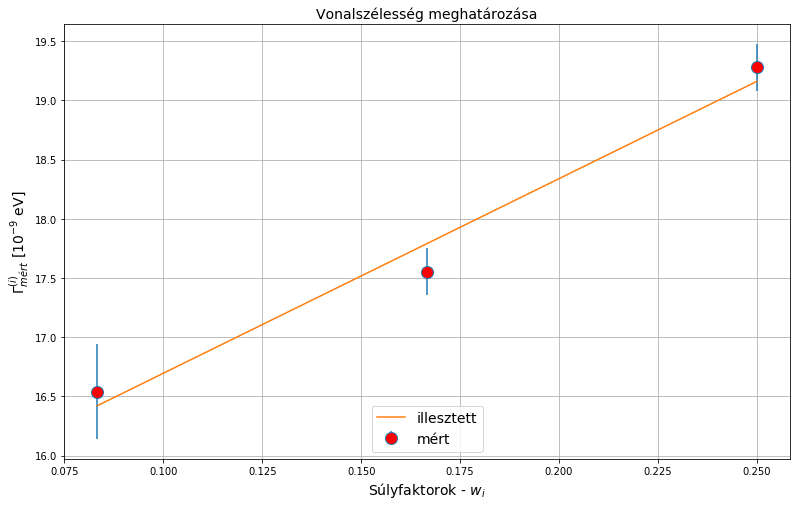

In [114]:
def linearFunc(x, m, B):
    return m*x+B

gammaMeasured = np.array([13.86, 12.62, 11.89])
gammaMeasured *= deltaE*10**12
gammaErr = np.array([0.2, 0.2, 0.4])
gammeErr *= deltaE*10**12

weight = [0.25, 1./6., 1./12.]

linearParams, linearCov  = optimise.curve_fit(linearFunc, weight, gammaMeasured, [32.3, 342.1])
linearErr = np.sqrt(np.diag(linearCov))

plt.figure(figsize=(13,8))
plt.title('Vonalszélesség meghatározása', fontsize = 14)
plt.xlabel('Súlyfaktorok - $w_{i}$', fontsize = 14)
plt.ylabel('$\Gamma_{mért}^{ (i)}$ [$10^{-9}$ eV]', fontsize = 14)
plt.grid(True)

values = []
for i in range(0, len(weight)):
    values.append(linearFunc(weight[i], *linearParams))

plt.errorbar(weight, gammaMeasured, gammaErr, marker='o', mfc='red', ms=12, ls='None', label='mért')
plt.plot(weight, values, label='illesztett')

plt.legend(fontsize = 14, loc='lower center')
plt.savefig('vonalszelesseg.png')

In [115]:
print(linearParams)
print(linearErr)

# Gamma_measured = 2.4Gamma + 1/4 * T_A * w_i * Gamma = B + m * w_i

gamma = linearParams[1]/2.4
gammaErr =  linearErr[1]/2.4

tau = 6.626*10**(-34)/(2*3.14159*gamma*10**(-9)*1.6*10**(-19))
tauErr = tau*gammaErr/gamma

print('gamma: ', gamma, 'pm', gammaErr , '10**-9 eV')
print('tau = h/(2*pi*gamma): ', tau, 'pm', tauErr)



[16.44209184 15.05105192]
[2.4575389  0.44240756]
gamma:  6.2712716320408886 pm 0.1843364826504326 10**-9 eV
tau = h/(2*pi*gamma):  1.0509845585871805e-07 pm 3.0892426323882635e-09
